# Image Features for Machine Learning Tasks

                          By Michael Gonzalez
                                    
This notebook will have three parts to it. These three parts are needed, when you want to create features from images. I have an example image of an airplane that is 256 pixels by 256 pixels. I will use this image to demonstrate the first two parts of this process. I will demonstrate each part and give a breif description on why it is useful to create features from images. Below is an overview of the three parts: 

   * The first part is called creating features for machine learning. 
   * The second part is called encoding mean color as a feature.
   * The third part is called encoding color histograms as features.

In [1]:
# Importing the needed libraries.
import cv2 
import numpy as np
from matplotlib import pyplot as plt

## Creating Features for Machine learning  

In [2]:
# Loading the image in the grayscale state.
image = cv2.imread(".../airplane_256_x_256.jpg", cv2.IMREAD_GRAYSCALE)

# Resize the image to a smaller size for easier computing.
image_10x10 = cv2.resize(image, (10, 10))

# Converting the image's data to a 1-D vector.
image_10x10.flatten()

array([255, 255, 255, 254, 238, 255, 255, 255, 255, 255, 255, 252, 253,
       203, 209, 211, 216, 254, 255, 255, 252, 221, 214, 218, 227, 254,
       252, 254,  80, 144, 255, 246, 216, 211, 214, 209, 104, 189, 253,
       255, 255, 215, 226, 142, 194, 136, 139, 113, 171, 255, 241, 224,
       221, 168, 238, 237, 228, 224, 230, 255, 255, 255, 234, 250, 233,
       224, 255, 255, 255, 253, 255, 249, 254, 223, 251, 253, 255, 255,
       255, 252, 249, 209, 168, 155, 156, 163, 186, 204, 227, 254, 255,
       243, 241, 239, 239, 239, 243, 245, 247, 255], dtype=uint8)

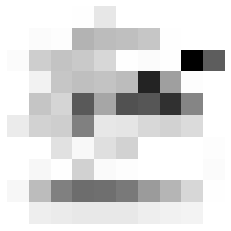

In [3]:
# Plotting out the grayscale image result from the above changes.
plt.imshow(image_10x10, cmap = "gray"), plt.axis("off")
plt.show()

Wow, this is a cool way to deal with grayscale images. What about color images? Well that is a great question. In the next section I will demonstrate a similar way to deal with color images.

In [4]:
# Loading the image in the original state.
image_color = cv2.imread(".../airplane_256_x_256.jpg", cv2.IMREAD_COLOR)

# Resize the color image to a smaller size for easier computing.
image_color_10x10 = cv2.resize(image_color, (10, 10))

# Converting the color image's data to a 1-D vector.
image_color_10x10.flatten()

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 253,
       243, 223, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 253, 246, 254, 253, 252,
       251, 213, 165, 250, 218, 177, 250, 220, 179, 251, 223, 188, 253,
       254, 255, 255, 255, 255, 255, 255, 255, 255, 252, 247, 253, 228,
       195, 248, 221, 185, 251, 225, 192, 251, 232, 209, 255, 253, 252,
       251, 252, 253, 255, 254, 252, 146,  77,  60, 122, 140, 160, 255,
       255, 255, 250, 249, 239, 244, 225, 189, 251, 220, 179, 249, 224,
       180, 245, 216, 180, 153, 100,  93, 202, 187, 187, 251, 252, 255,
       255, 255, 255, 253, 255, 255, 244, 221, 191, 244, 231, 208, 167,
       140, 138, 229, 192, 184, 170, 133, 129, 173, 138, 128, 137, 109,
       111, 199, 172, 157, 255, 255, 255, 250, 241, 236, 247, 229, 206,
       238, 224, 209, 187, 167, 163, 252, 241, 228, 253, 240, 225, 240,
       231, 217, 242, 229, 207, 253, 235, 213, 255, 254, 255, 25

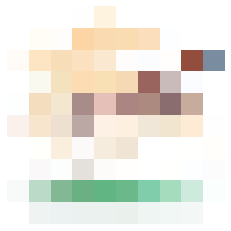

In [5]:
# Plotting out the color image result from the above changes.
plt.imshow(image_color_10x10, cmap = "Accent"), plt.axis("off")
plt.show()

## Encoding Mean Color as a Feature 

In [6]:
# Loading the image as BGR.
image_bgr = cv2.imread(".../airplane_256_x_256.jpg", cv2.IMREAD_COLOR)

# Calculating the mean of each color channel.
channels = cv2.mean(image_bgr)

# Swapping the blue and red values to RGB.
observation = np.array([(channels[2], channels[1], channels[0])])

# Displaying the mean channel values for each color.
observation

array([[217.42352295, 227.31364441, 230.72209167]])

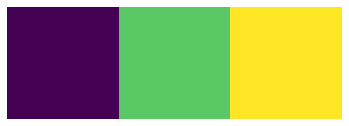

In [7]:
# Plotting out the mean channel values for each color.
plt.imshow(observation), plt.axis("off")
plt.show()

## Encoding Color Histogram Features 

In [8]:
# Converting the image to RGB.
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Creating a list for the feature values.
features = []

# Calculating the histogram for each color channel.
colors = ("r", "g", "b")

#For each color channel: histogram and feature value list.
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    features.extend(histogram)
    
# Creating a vector for an observation's feature value.
observation = np.array(features).flatten()

# Displaying the observation's value for the first five features.
observation[0:5]

array([11.,  4.,  1.,  3.,  3.], dtype=float32)

This is pretty cool, but we can't really tell if they are any insights. I will be redoing the feature list with a proper histogram.

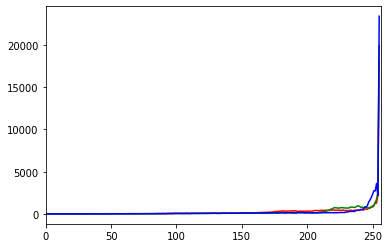

In [9]:
#Redoing each color channel: histogram and feature value list.
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.plot(histogram, color = channel)
    plt.xlim([0, 256])
    
# Here is where we get to see a visual of the feature value list.
plt.show()